In [8]:
%matplotlib inline

import sys
import csv
import heapq
import numpy as np
import matplotlib.pyplot as plt

orgNames = [];
totalValues = [];

try: # Try to open the file.
    dataFile = open("datagovdatasetsviewmetrics.csv", "rb");
    
except IOError as e:
    print "data file could not be opened."
    sys.exit(1)

# Initialize the reader.
reader = csv.reader(dataFile);

# Read in the property names and their indices.
propertyIndices = {};
propertyNames = reader.next();
for i in range(len(propertyNames)):
    propertyIndices[ propertyNames[i] ] = i;

ORG_NAME_KEY = "Organization Name";
VIEWS_KEY    = "Views per Month";
    
# Get the indices that we can read the properties from.
ORG_NAME_INDEX = -1 if ORG_NAME_KEY not in propertyIndices else propertyIndices[ORG_NAME_KEY];
VIEWS_INDEX    = -1 if VIEWS_KEY not in propertyIndices else propertyIndices[VIEWS_KEY];

if ORG_NAME_INDEX >= 0 and VIEWS_INDEX >= 0:
    print "orgName index:",ORG_NAME_INDEX
    print "views index:",VIEWS_INDEX
    print ""
else:
    print "Couldn't parse property indices."
    print str(propertyNames);
    print "orgName index:",ORG_NAME_INDEX
    print "views index:",VIEWS_INDEX
    sys.exit(2)
    

# 1.  Reduce the total list of rows into a list of organizations each with the summation of the associated views.
indexMap = {};
totalViewsList = [];
count = 0;

for row in reader: # O(n) which yields a smaller list of length m, such that m <= n.
    count+=1;

    # Making the first values of the tuple an intergral type treats them as the heap priority.
    # In any case, we're remembering the number views as a negative so that the python heapq can be 
    # used as a max heap.  There's no natively better supported way to do this at the moment without
    # using another library.
    orgName = row[ORG_NAME_INDEX];
    views = -int(row[VIEWS_INDEX]);

    if orgName in indexMap:
        index = indexMap[orgName];
        #print "found index",index,"for org name",orgName
        obj = (totalViewsList[index][0] + views, orgName);
        totalViewsList[index] = obj;
    else:
        # Create the new tuple, remember where we're putting it, and put it there.
        obj = (views, orgName);
        index = len(totalViewsList);
        indexMap[orgName] = index;
        totalViewsList.append(obj);
        # Test it.
        #print "added orgName:", orgName, "to indexMap at index:", index
        #if not index == indexMap[orgName]:
        #    print "problem!  Org name isn't mapped to intended index!  Results won't be correct."

print "done: total organizations", len(totalViewsList), "totalRecords:", count, "\n";

# Heapify it all at once.  Quicker than pushing each, which would be O(m lg m).
heapq.heapify(totalViewsList); # O(m)

prevTotal = -1;
uniqueTotalsCount = 0;

# Pop views until we have enough results (10 unique view totals).  O(m lg m)
# Since we're effectively using a max heap, the results are in descending order.
for index in range( len(totalViewsList) ):
    # pull the object.
    obj = heapq.heappop(totalViewsList);

    # flip the total, as it was negative to make the heap behave as a max heap.
    total = obj[0] * -1

    # create a new object as we can't overwrite a tuple and push it into the presentation results.
    orgNames.append(obj[1]);
    totalValues.append(total);

    if total != prevTotal:
        uniqueTotalsCount += 1;

    prevTotal = total;
    if uniqueTotalsCount == 10:
        break;    
        
# Pretty Print.
# https://docs.python.org/2/library/string.html#formatstrings
rowFormatStr = "{0:<80s} {1:<15d}";
headerFormatStr = "{0:<80s} {1:<15s}";
print headerFormatStr.format("Organization Name", "Total Views");
print "{0:-<80s} {1:-^15s}".format("", "");
for index in range( len(orgNames) ):
    print rowFormatStr.format(orgNames[index], totalValues[index]);
        

orgName index: 2
views index: 3

done: total organizations 172 totalRecords: 210537 

Organization Name                                                                Total Views    
-------------------------------------------------------------------------------- ---------------
US Census Bureau, Department of Commerce                                         178510         
National Oceanic and Atmospheric Administration, Department of Commerce          155713         
U.S. Geological Survey, Department of the Interior                               109848         
U.S. Department of Health & Human Services                                       93297          
Department of Agriculture                                                        76948          
Department of Defense                                                            45886          
Earth Data Analysis Center, University of New Mexico                             41974          
Department of Education                  

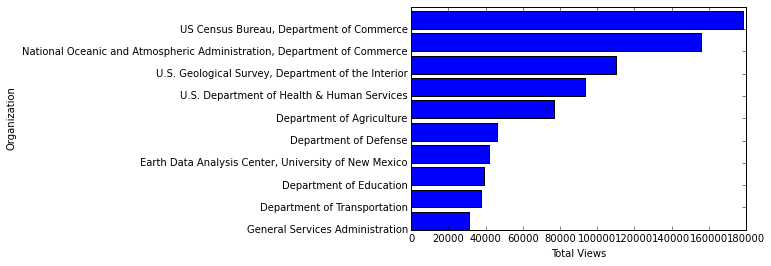

In [7]:
# Build the bar chart.
# Note that the chart could be configured a little better to look nicer with larger data sets.
index = np.arange(len(totalValues))[::-1]

plt.figure();
plt.barh(width=totalValues, bottom=index)

plt.yticks(index, tuple(orgNames))
plt.xlabel('Total Views')
plt.ylabel('Organization')

plt.show();    

